In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [8]:
# load the client data
bank = pd.read_csv("bank-full.csv", sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


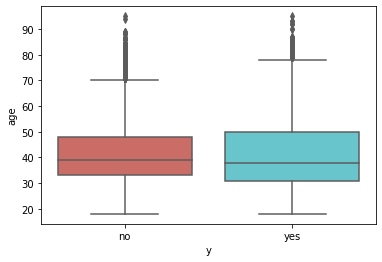

In [13]:
# visualization 
sb.boxplot(x="y",y="age",data = bank,palette = 'hls')

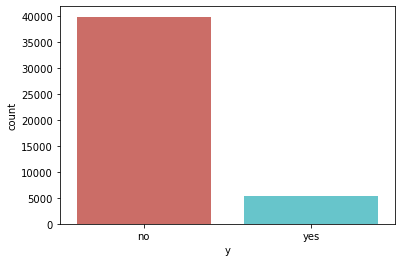

In [14]:
sb.countplot(x="y",data = bank,palette="hls")

In [19]:
# cross tab 
pd.crosstab(bank.y,bank.loan)

loan,no,yes
y,,
no,33162,6760
yes,4805,484


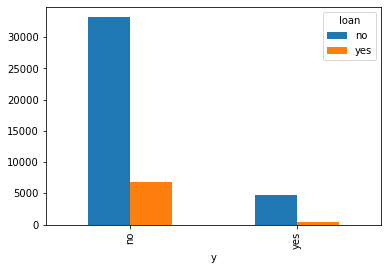

In [18]:
pd.crosstab(bank.y,bank.loan).plot(kind = 'bar')

In [20]:
bank['job']=bank['job'].astype('category')  
bank['marital']=bank['marital'].astype('category') 
bank['education']=bank['education'].astype('category') 
bank['default']=bank['default'].astype('category') 
bank['housing']=bank['housing'].astype('category') 
bank['loan']=bank['loan'].astype('category') 
bank['contact']=bank['contact'].astype('category') 
bank['month']=bank['month'].astype('category') 
bank['poutcome']=bank['poutcome'].astype('category') 
bank['y']=bank['y'].astype('category') 

In [21]:
bank = pd.get_dummies(bank,columns=['job'])
bank = pd.get_dummies(bank,columns=['marital'])
bank = pd.get_dummies(bank,columns=['education'])
bank = pd.get_dummies(bank,columns=['default'])
bank = pd.get_dummies(bank,columns=['housing'])
bank = pd.get_dummies(bank,columns=['loan'])
bank = pd.get_dummies(bank,columns=['contact'])
bank = pd.get_dummies(bank,columns=['month'])
bank = pd.get_dummies(bank,columns=['poutcome'])
bank = pd.get_dummies(bank,columns=['y'])

In [22]:
# model building 
from sklearn.linear_model import LogisticRegression
bank.shape

(45211, 53)

In [23]:
# dividing data into input and output variables
X = bank.iloc[:,:15]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\mutuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#coefficients
classifier.coef_

array([[ 6.99360195e-03, -3.10737142e-05,  3.77651830e-02,
         1.98170065e-04, -3.15391044e-03, -5.12123646e-03,
         5.06732848e-01, -3.50658563e+00, -6.37916139e+00,
        -9.38178879e-01, -7.04793380e-01, -6.14119141e+00,
        -7.81057554e-01, -1.04353801e+00, -2.86564109e+00]])

In [26]:
# probability values
classifier.predict_proba(X)

array([[0.99862046, 0.00137954],
       [0.62186037, 0.37813963],
       [0.82150601, 0.17849399],
       ...,
       [0.51315286, 0.48684714],
       [0.99815068, 0.00184932],
       [0.02869865, 0.97130135]])

In [27]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,y_pred
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,0,0,0,1,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [30]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
df = pd.concat([bank,y_prob],axis = 1)
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,y_pred,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,1,0,0,0.998620,0.001380
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,1,1,0,0,0.621860,0.378140
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,1,1,0,0,0.821506,0.178494
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,1,1,0,0,0.999006,0.000994
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,1,1,0,0,0.637423,0.362577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,1,1,0.465721,0.534279
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0.652951,0.347049
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,1,0,0.513153,0.486847
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,1,0,0,0.998151,0.001849


In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[36193  1421]
 [ 4382  3215]]


In [32]:
pd.crosstab(y_pred,Y)

job_technician,0,1
row_0,,
0,36193,4382
1,1421,3215


In [33]:
# accuracy value  of the model
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.8716462807723784

In [34]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     37614
           1       0.69      0.42      0.53      7597

    accuracy                           0.87     45211
   macro avg       0.79      0.69      0.73     45211
weighted avg       0.86      0.87      0.86     45211



In [44]:
# roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.6927074395343137

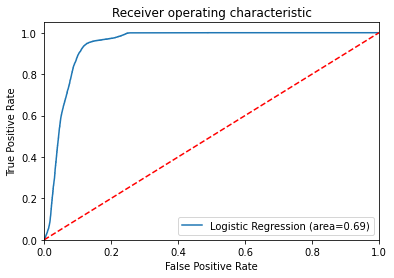

In [36]:
# plot roc curve diagram 
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [38]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])
y_prob1

,0
0,0.001380
1,0.378140
2,0.178494
3,0.000994
4,0.362577
...,...
45206,0.534279
45207,0.347049
45208,0.486847
45209,0.001849


# 